# Replacing the CEO funds an average startup 1M more dollars

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [220]:
milestone = pd.read_csv("../data/milestones.csv")
objects = pd.read_csv("../data/objects_c.csv")
relationships = pd.read_csv("../data/relationships.csv")
people = pd.read_csv("../data/people.csv")
funding_rounds = pd.read_csv("../data/funding_rounds.csv")

In [221]:
# funding_rounds = funding_rounds.replace(to_replace="crowd", value="0")
# funding_rounds = funding_rounds.replace(to_replace="crowd_equity", value="0")
# funding_rounds = funding_rounds.replace(to_replace="seed", value="1")
# funding_rounds = funding_rounds.replace(to_replace="angel", value="2")
# funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "debt_round"]
# funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "post_ipo_debt"]
# funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "convertible"]
funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "grant"]
funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "crowd"]
funding_rounds = funding_rounds[funding_rounds['funding_round_code'] != "crowd_equity"]
funding_rounds = funding_rounds[funding_rounds['raised_amount_usd'] != 0]

In [222]:
# Switching timestamp to phase
funding_rounds["funding_round_num"] = funding_rounds.groupby("object_id")["funded_at"].rank("dense", ascending=True)

In [223]:
# Funding matrix
funding_matrix = funding_rounds.pivot_table(values="raised_amount_usd",
                           index="object_id",
                           columns='funding_round_num')
funding_matrix = funding_matrix.pct_change(axis=1) # Use percentage change
funding_matrix

funding_round_num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
object_id,,,,,,,,,,,,,,,
c:1,NaN,0.809524,1.631579,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:1001,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:10015,NaN,3.500000,-0.770089,4.799343,2.583333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:100155,NaN,16.319801,-0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:10018,NaN,0.250000,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c:99853,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:9989,NaN,-0.166667,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:9994,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
# relationships['isCEO'] = relationships.title.apply(lambda x: "CEO" in str(x) or
#                                                    "Chief Executive Officer" in str(x) or
#                                                    "Founder" in str(x))

relationships['isCEO'] = relationships.title.apply(lambda x: "CEO" in str(x) or
                                                   "Chief Executive Officer" in str(x))

relationships_CEO = relationships[relationships['isCEO']]              # Select CEO
relationships_CEO = relationships_CEO[relationships_CEO['is_past']==1] # Select Past CEO
# Past CEOs that have registered end date
relationships_CEO = relationships_CEO[np.logical_not(relationships_CEO.end_at.isna())] 

In [232]:
ct = relationships_CEO.groupby("relationship_object_id").count()['isCEO']
ct = ct[ct==1] # Select one CEO changes

In [242]:
relationships_CEO = relationships_CEO.merge(ct.reset_index(), how="right", left_on="relationship_object_id",
                        right_on="relationship_object_id")

In [243]:
fd_rounds = funding_rounds.merge(relationships_CEO[['relationship_object_id', 'end_at']],
                     how='left', left_on='object_id',
                     right_on='relationship_object_id', copy=False)
fd_rounds['CEO_changed'] = fd_rounds['end_at'] <= fd_rounds['funded_at']

In [319]:
fd_rounds[fd_rounds.CEO_changed == True]

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,is_last_round,source_url,source_description,created_by,created_at,updated_at,funding_round_num,relationship_object_id,end_at,CEO_changed
20,22,22,c:30,2007-06-01,series-a,a,12500000.0,12500000.0,USD,0.0,...,0,"http://www.powerset.com/press/seriesa, http://...",NaN,initial-importer,2007-06-11 19:36:06,2008-05-13 15:59:39,3.0,c:30,1984-10-27,True
119,133,133,c:156,2006-10-01,series-b,b,4000000.0,4000000.0,USD,0.0,...,0,NaN,NaN,initial-importer,2007-07-12 12:19:32,2008-03-12 01:07:22,2.0,c:156,2006-01-01,True
120,134,134,c:156,2007-07-01,series-c+,c,15000000.0,15000000.0,USD,0.0,...,0,NaN,NaN,initial-importer,2007-07-12 12:21:23,2008-03-12 01:07:22,3.0,c:156,2006-01-01,True
211,238,238,c:264,2007-07-01,series-a,a,5000000.0,5000000.0,USD,0.0,...,1,NaN,NaN,initial-importer,2007-07-25 10:43:40,2008-05-15 23:18:22,1.0,c:264,2006-11-01,True
333,387,387,c:401,2007-08-01,series-a,a,5500000.0,5500000.0,USD,0.0,...,1,NaN,NaN,initial-importer,2007-08-22 04:30:58,2008-02-25 00:24:19,1.0,c:401,2005-01-01,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45884,57704,57704,c:31683,2010-04-22,venture,unattributed,6100125.0,6100125.0,USD,0.0,...,0,http://www.sec.gov/Archives/edgar/data/1391913...,SEC,amit2013,2013-12-11 11:05:00,2013-12-11 11:05:00,5.0,c:31683,2010-01-31,True
45967,57807,57807,c:38811,2013-12-11,series-c+,c,100000000.0,100000000.0,USD,0.0,...,0,http://gigaom.com/2013/12/11/shopify-raises-10...,Shopify raises $100 million Series C to expand...,arun,2013-12-12 05:12:53,2013-12-12 05:12:53,3.0,c:38811,2008-05-01,True
46032,57885,57885,c:17284,2010-04-08,venture,partial,3678786.0,3678786.0,USD,0.0,...,0,http://www.sec.gov/Archives/edgar/data/1112314...,SEC,prasant2013,2013-12-12 10:57:07,2013-12-12 10:57:07,4.0,c:17284,2010-01-01,True
46034,57887,57887,c:238878,2010-02-01,other,debt_round,5000000.0,5000000.0,USD,0.0,...,1,http://www.sec.gov/Archives/edgar/data/1421000...,SEC,santosh2013,2013-12-12 11:01:46,2013-12-12 11:01:46,1.0,c:238878,2009-01-01,True


In [320]:
fd = fd_rounds[fd_rounds.CEO_changed == True].groupby("object_id")['funding_round_num'].min()
fd = fd.reset_index()
fd

,object_id,funding_round_num
0,c:10139,2.0
1,c:104321,1.0
2,c:1056,3.0
3,c:1071,2.0
4,c:10716,3.0
...,...,...
513,c:9467,2.0
514,c:95,4.0
515,c:9668,1.0
516,c:9743,5.0


In [321]:
# Merge with CEO change round
X = funding_matrix.merge(fd, how='left', left_on='object_id', right_on='object_id')

# Only select those that have websites
X = X.merge(objects[['id', 'has_website']], left_on='object_id', right_on='id', how='left')

X = X[X.has_website==1]

In [322]:
for i in range(7,16):
  del X[i]

In [323]:
# Sinse we restrict funding round to the first 6
# if funding round >= 6, we set them NaN

X.loc[X.funding_round_num >= 6, "funding_round_num"] = pd.NA

In [324]:
X[X.funding_round_num == 2]

,object_id,1.0,2.0,3.0,4.0,5.0,6.0,funding_round_num,id,has_website
289,c:10906,NaN,-0.906250,0.666667,0.000000,0.0,0.0,2.0,c:10906,1.0
402,c:11491,NaN,0.549296,-0.727273,0.000000,0.0,0.0,2.0,c:11491,1.0
474,c:1184,NaN,3.000000,-0.250000,0.000000,0.0,0.0,2.0,c:1184,1.0
872,c:13464,NaN,-0.923077,0.000000,0.000000,0.0,0.0,2.0,c:13464,1.0
901,c:13539,NaN,0.800000,0.000000,0.000000,0.0,0.0,2.0,c:13539,1.0
1856,c:146462,NaN,-0.123077,0.000000,0.000000,0.0,0.0,2.0,c:146462,1.0
2676,c:152965,NaN,-0.870130,0.000000,0.000000,0.0,0.0,2.0,c:152965,1.0
2841,c:15421,NaN,0.500000,0.041667,-0.120000,0.0,0.0,2.0,c:15421,1.0
2998,c:15568,NaN,-0.860000,9.000000,-0.571429,0.0,0.0,2.0,c:15568,1.0
3157,c:156993,NaN,-0.120000,4.681818,0.000000,0.0,0.0,2.0,c:156993,1.0


In [325]:
np.logical_not(X.funding_round_num.isna()).sum()

89

In [326]:
X.to_csv("../data/synthetic_matrix.csv")

([<matplotlib.axis.XTick at 0x7f9e4d006ad0>,
 <a list of 5 Text xticklabel objects>)

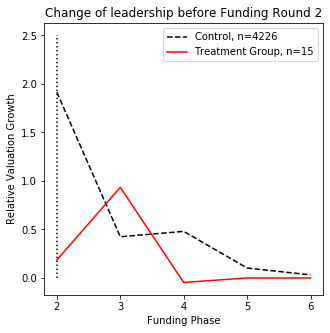

In [327]:
plt.figure(figsize=(5,5))
plt.plot(X[X.funding_round_num.isna()].iloc[:, 2:7].mean(), "k--")
plt.plot(X[X.funding_round_num == 2].iloc[:, 2:7].mean(), "r")
plt.vlines(2, ymin=0, ymax=2.5, linestyles="dotted")
plt.title("Change of leadership before Funding Round 2")

plt.legend([f"Control, n={(X.funding_round_num.isna()).sum()}",
            f"Treatment Group, n={(X.funding_round_num == 2).sum()}"])
plt.ylabel("Relative Valuation Growth")
plt.xlabel("Funding Phase")
plt.xticks([2,3,4,5,6])

([<matplotlib.axis.XTick at 0x7f9e435b1690>,
 <a list of 5 Text xticklabel objects>)

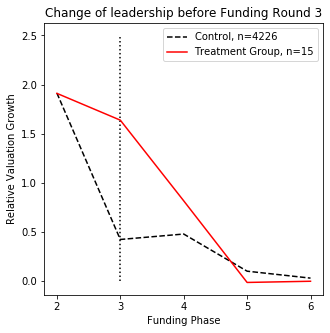

In [328]:
plt.figure(figsize=(5,5))
plt.plot(X[X.funding_round_num.isna()].iloc[:, 2:7].mean(), "k--")
plt.plot(X[X.funding_round_num == 3].iloc[:, 2:7].mean(), "r")
plt.vlines(3, ymin=0, ymax=2.5, linestyles="dotted")
plt.title("Change of leadership before Funding Round 3")

plt.legend([f"Control, n={(X.funding_round_num.isna()).sum()}",
            f"Treatment Group, n={(X.funding_round_num == 3).sum()}"])
plt.ylabel("Relative Valuation Growth")
plt.xlabel("Funding Phase")
plt.xticks([2,3,4,5,6])

In [329]:
X[X.funding_round_num == 3].iloc[:, 2:7]

,2.0,3.0,4.0,5.0,6.0
202,1.240000,1.500000,0.000000,0.000000,0.0
559,2.600000,1.000000,0.561111,-0.181495,0.0
773,3.257540,-0.244629,0.000000,0.000000,0.0
1423,0.000000,0.333333,10.000000,0.000000,0.0
2124,2.000000,0.688889,0.000000,0.000000,0.0
2193,3.375000,10.428571,0.000000,0.000000,0.0
2745,0.562500,-0.660002,1.705898,0.000000,0.0
3132,1.222222,-0.250000,0.000000,0.000000,0.0
4069,0.533333,1.173913,0.000000,0.000000,0.0
5002,4.000000,-0.700000,0.000000,0.000000,0.0


([<matplotlib.axis.XTick at 0x7f9e4b524a10>,
 <a list of 5 Text xticklabel objects>)

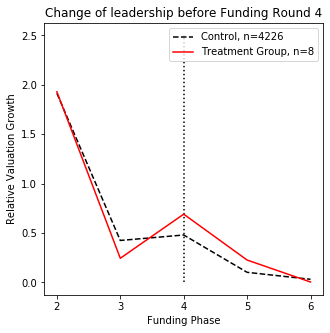

In [330]:
plt.figure(figsize=(5,5))
plt.plot(X[X.funding_round_num.isna()].iloc[:, 2:7].mean(), "k--")
plt.plot(X[X.funding_round_num == 4].iloc[:, 2:7].mean(), "r")
plt.vlines(4, ymin=0, ymax=2.5, linestyles="dotted")
plt.title("Change of leadership before Funding Round 4")

plt.legend([f"Control, n={(X.funding_round_num.isna()).sum()}",
            f"Treatment Group, n={(X.funding_round_num == 4).sum()}"])
plt.ylabel("Relative Valuation Growth")
plt.xlabel("Funding Phase")
plt.xticks([2,3,4,5,6])

([<matplotlib.axis.XTick at 0x7f9e4cbbf8d0>,
 <a list of 5 Text xticklabel objects>)

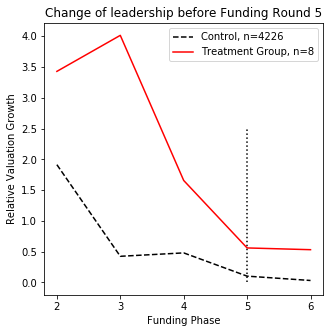

In [331]:
plt.figure(figsize=(5,5))
plt.plot(X[X.funding_round_num.isna()].iloc[:, 2:7].mean(), "k--")
plt.plot(X[X.funding_round_num == 5].iloc[:, 2:7].mean(), "r")
plt.vlines(5, ymin=0, ymax=2.5, linestyles="dotted")
plt.title("Change of leadership before Funding Round 5")

plt.legend([f"Control, n={(X.funding_round_num.isna()).sum()}",
            f"Treatment Group, n={(X.funding_round_num == 5).sum()}"])
plt.ylabel("Relative Valuation Growth")
plt.xlabel("Funding Phase")
plt.xticks([2,3,4,5,6])

Continue to process this data with R, and read back the results

In [253]:
estimated_matrix = pd.read_csv("../data/Emat.csv", index_col=0).round(5)
estimated_matrix

,V1,V2,V3,V4,V5
1,0.0,-0.0,-0.0,0.0,0.0
2,0.0,-0.0,-0.0,0.0,0.0
3,-0.0,-0.0,-0.0,0.0,0.0
4,0.0,0.0,0.0,-0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
4311,0.0,0.0,0.0,0.0,0.0
4312,0.0,0.0,0.0,0.0,0.0
4313,0.0,0.0,0.0,0.0,0.0
4314,0.0,0.0,0.0,0.0,0.0


In [254]:
TrEffect = pd.concat([(X.iloc[:,2:-3] - np.array(estimated_matrix)),
                X.funding_round_num], axis=1)
TrEffect

,2.0,3.0,4.0,5.0,6.0,funding_round_num
0,0.809524,1.631579,0.000000,0.000000,0.0,NaN
1,3.500000,-0.770089,4.799343,2.583333,0.0,NaN
2,16.319801,-0.500000,0.000000,0.000000,0.0,NaN
3,0.250000,0.500000,0.000000,0.000000,0.0,NaN
4,0.000000,0.000000,0.000000,0.000000,0.0,NaN
...,...,...,...,...,...,...
22872,3.000000,4.000000,1.500000,3.000000,0.0,NaN
22873,0.000000,0.000000,0.000000,0.000000,0.0,NaN
22874,0.000000,0.000000,0.000000,0.000000,0.0,NaN
22875,0.000000,0.000000,0.000000,0.000000,0.0,NaN


In [255]:
TrEffect4Tred = TrEffect.dropna()
one_term = []
for i in range(TrEffect4Tred.shape[0]):
  idx = TrEffect4Tred.iloc[i, -1]
  to_choose = int(max(1, idx-1))
  one_term.append(TrEffect4Tred.iloc[i, to_choose])

In [256]:
TrEffect4Tred

,2.0,3.0,4.0,5.0,6.0,funding_round_num
144,1.240000,0.710350,0.42950,0.19593,0.16422,3.0
199,-0.906250,0.502017,0.22117,-0.01241,-0.04411,3.0
213,0.063860,0.319380,0.03854,-0.19504,-0.22674,1.0
270,0.549296,0.153527,-0.12732,-0.36089,-0.39259,3.0
318,3.000000,0.272850,-0.00800,-0.24157,-0.27328,3.0
...,...,...,...,...,...,...
21696,0.063860,0.319380,0.03854,-0.19504,-0.22674,1.0
22001,0.063860,0.319380,0.03854,-0.19504,-0.22674,1.0
22238,0.063860,0.319380,0.03854,-0.19504,-0.22674,1.0
22408,0.438375,0.311742,0.03090,-0.20268,-0.23438,3.0


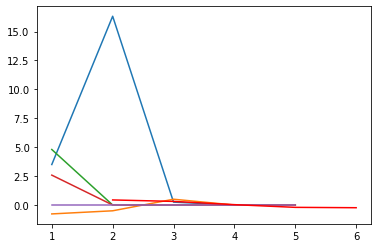

In [257]:
plt.plot(X.iloc[1:6, 2:-3])
plt.plot(TrEffect4Tred.iloc[-2, :-1], color="red")

(array([18., 47., 10.,  0.,  3.,  0.,  1.,  1.,  1.,  1.]),
 array([-0.32246,  0.03639,  0.39524,  0.75409,  1.11294,  1.47179,
         1.83064,  2.18949,  2.54834,  2.90719,  3.26604]),
 <a list of 10 Patch objects>)

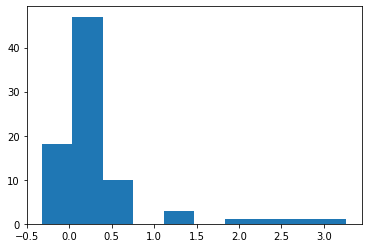

In [258]:
plt.hist(one_term)

In [259]:
one_term = np.array(one_term)
np.savetxt("../data/TrEffect.csv", one_term)

In [260]:
np.mean(one_term)

0.37265695121951214

In [261]:
np.std(one_term)

0.5958712452852362

In [262]:
np.mean(one_term >= 0)

0.7926829268292683